# Machine Learning Foundations - Course Project

**1- Selected approach:**
We are trying to predict a continuous, discrete variable (Net hourly electrical energy). We will use a Regression approach. To evaluate the regression models, we will use MAE and R squared.

**2- Selection of features and algorithms:**

The data available on the dataset are:
- Temperature (T)
- Ambient Pressure (AP)
- Relative Humidity (RH)
- Exhaust Vacuum (V)

For the algorithms, we would consider two approaches
- Linear regression
- Random Forest

**3- Data Split - Test Set**
We will use 80% of the data available for training and 20% for testing.

**4- Model comparison**
We will use cross-validation with five folds

**5- Model evaluation**
To evaluate the models, we will compare the final model metrics that we selected before.

### Install required libraries

In [25]:
%pip install pandas
%pip install scikit-learn
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 8.0/8.0 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Required Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is optional it is just to make visual our results
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Import Data

In [36]:
df = pd.read_csv('CCPP_data.csv')

### Analyze the data

In [37]:
print(df.describe())
print(df.info())

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   floa

### Data preparation (seleccion of features (x) and target (y))

In [38]:
X = df[['AT', 'AP', 'RH', 'V']] #Features
Y = df['PE'] #Target

### Divide the data into training and test sets.

In [39]:
# 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Train and validate the models.

#### Linear Regression

In [41]:
lr = LinearRegression()
# We use cross validation with five folds to evaluate the model
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Trainning the model with de training data set.
lr.fit(X_train, y_train)

# Making predictions with the data test set.
y_pred_lr = lr.predict(X_test)

# Evaluating the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

#### Random Forest

In [32]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# We use cross validation with five folds to evaluate the model
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Trainning the model with de training data set.
rf.fit(X_train, y_train)

# Making predictions with the data test set.
y_pred_rf = rf.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

### Model comparison

#### Compare the performance of the models using the average MSE of the cross-validation

In [33]:
print("Linear Regression MSE: ", -np.mean(lr_scores))
print("Random Forest MSE: ", -np.mean(rf_scores))

Linear Regression MSE:  20.91923604263527
Random Forest MSE:  11.997195026691825


In [34]:
print("Linear Regression Test MSE: ", mse_lr)
print("Linear Regression Test R²: ", r2_lr)
print("Random Forest Test MSE: ", mse_rf)
print("Random Forest Test R²: ", r2_rf)

Linear Regression Test MSE:  20.27370599968743
Linear Regression Test R²:  0.9301046431962188
Random Forest Test MSE:  10.523296585302948
Random Forest Test R²:  0.9637200238775732


#### Visualize our results

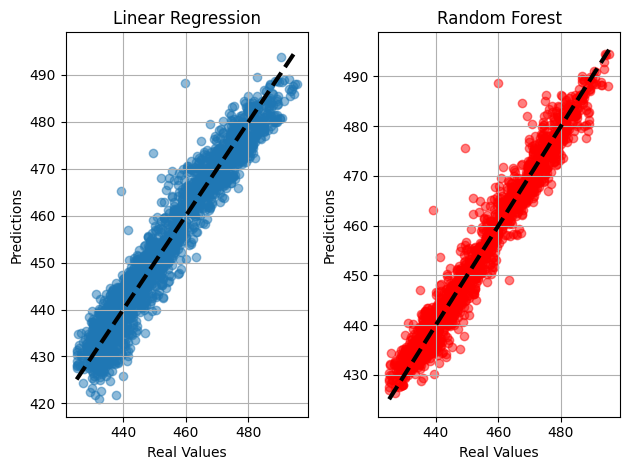

In [44]:
# Create a figure with two graphs
y_pred_rf = rf.predict(X_test)

# Linear Regression Graph
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.grid(True)

# Random Forest Graph
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Random Forest')
plt.grid(True)

plt.tight_layout()
plt.show()

### Conclusions

For this case, it's clear that the random forest approach outperforms the linear regression, providing us with more accurate predictions.

**Model results**
- ***Linear Regression***
Test MSE: 20.27
Test R²: 0.93
- ***Random Forest:***
Test MSE: 10.52
Test R²: 0.96

A low MSE indicates a better model performance, and an R2 value next to 1 indicates a better fit for the data model. Both models have a high R2, but Random Forest is closest to 1; this indicates a better fit.